In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [37]:
merged = pd.read_csv('clean_merged.csv')
merged.head()

,State,AreaName,All_Poverty,M_Poverty,F_Poverty,FIPS,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,...,F_Without,All_With,All_Without,fips_x,Incidence_Rate,Avg_Ann_Incidence,recent_trend,fips_y,Mortality_Rate,Avg_Ann_Deaths
0,AK,"Anchorage Municipality, Alaska",23914,10698,13216,2020,78326.0,87235.0,50535.0,53935.0,...,21393,243173,44638,2020,61.5,131,stable,2020,47.3,96
1,AK,"Bethel Census Area, Alaska",4364,2199,2165,2050,51012.0,92647.0,73661.0,41594.0,...,1774,13023,4482,2050,62.7,6,stable,2050,58.3,5
2,AK,"Fairbanks North Star Borough, Alaska",7752,3523,4229,2090,71068.0,74242.0,56353.0,48333.0,...,5322,80815,12279,2090,58.1,36,stable,2090,54.0,31
3,AK,"Juneau City and Borough, Alaska",2110,1145,965,2110,85746.0,90553.0,106964.0,57821.0,...,2213,27321,4646,2110,35.1,9,stable,2110,34.4,8
4,AK,"Kenai Peninsula Borough, Alaska",5558,2596,2962,2122,63684.0,64663.0,122660.0,46458.0,...,5433,44059,11868,2122,64.9,39,stable,2122,50.1,28


In [38]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              2618 non-null   object 
 1   AreaName           2618 non-null   object 
 2   All_Poverty        2618 non-null   int64  
 3   M_Poverty          2618 non-null   int64  
 4   F_Poverty          2618 non-null   int64  
 5   FIPS               2618 non-null   int64  
 6   Med_Income         2618 non-null   float64
 7   Med_Income_White   2618 non-null   float64
 8   Med_Income_Black   2618 non-null   float64
 9   Med_Income_Nat_Am  2618 non-null   float64
 10  Med_Income_Asian   2618 non-null   float64
 11  Hispanic           2618 non-null   float64
 12  M_With             2618 non-null   int64  
 13  M_Without          2618 non-null   int64  
 14  F_With             2618 non-null   int64  
 15  F_Without          2618 non-null   int64  
 16  All_With           2618 

In [39]:
merged.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths'],
      dtype='object')

In [40]:
drop_cols = ['State', 'AreaName','FIPS', 'fips_x', 'fips_y', 'All_Poverty', 'All_With', 'All_Without', 'recent_trend']
merged.drop(drop_cols, axis = 1, inplace = True)

In [41]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   M_Poverty          2618 non-null   int64  
 1   F_Poverty          2618 non-null   int64  
 2   Med_Income         2618 non-null   float64
 3   Med_Income_White   2618 non-null   float64
 4   Med_Income_Black   2618 non-null   float64
 5   Med_Income_Nat_Am  2618 non-null   float64
 6   Med_Income_Asian   2618 non-null   float64
 7   Hispanic           2618 non-null   float64
 8   M_With             2618 non-null   int64  
 9   M_Without          2618 non-null   int64  
 10  F_With             2618 non-null   int64  
 11  F_Without          2618 non-null   int64  
 12  Incidence_Rate     2618 non-null   float64
 13  Avg_Ann_Incidence  2618 non-null   int64  
 14  Mortality_Rate     2618 non-null   float64
 15  Avg_Ann_Deaths     2618 non-null   int64  
dtypes: float64(8), int64(8)


In [42]:
merged.describe()

,M_Poverty,F_Poverty,Med_Income,Med_Income_White,Med_Income_Black,Med_Income_Nat_Am,Med_Income_Asian,Hispanic,M_With,M_Without,F_With,F_Without,Incidence_Rate,Avg_Ann_Incidence,Mortality_Rate,Avg_Ann_Deaths
count,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000,2.618000e+03,2618.000000,2.618000e+03,2618.000000,2618.000000,2618.000000,2618.000000,2618.000000
mean,7888.520626,9719.574866,46567.062261,49387.087471,35180.581315,44585.824316,66149.483130,41027.788558,4.774811e+04,8000.481665,5.160622e+04,6894.100840,70.209549,78.992361,53.632468,57.888846
std,26698.441317,32276.118433,12548.003930,12754.416512,15737.656460,17988.126744,25097.371681,14797.550044,1.391230e+05,30982.072742,1.513409e+05,26617.530663,17.636388,181.016271,14.109976,130.346484
min,110.000000,116.000000,19328.000000,19340.000000,2499.000000,2499.000000,2499.000000,2499.000000,8.550000e+02,95.000000,1.046000e+03,90.000000,13.500000,4.000000,9.200000,3.000000
25%,1126.000000,1392.250000,38236.250000,41170.000000,26063.500000,37155.250000,57158.750000,33125.000000,6.365500e+03,1052.000000,6.583250e+03,917.500000,58.600000,15.000000,44.200000,11.000000
50%,2342.000000,2979.500000,44540.000000,47030.000000,31870.000000,41824.317460,61967.500000,39158.500000,1.318950e+04,2157.500000,1.411950e+04,1903.500000,69.600000,29.000000,53.000000,23.000000
75%,5631.750000,7192.750000,51993.750000,54462.000000,39282.520833,49496.427184,72490.353659,45710.500000,3.434800e+04,5282.000000,3.658250e+04,4560.000000,80.100000,68.000000,61.800000,50.750000
max,823612.000000,976653.000000,123453.000000,136311.000000,170195.000000,250001.000000,250001.000000,223750.000000,3.904322e+06,997326.000000,4.230137e+06,837175.000000,203.700000,3701.000000,125.600000,2876.000000


In [43]:
X = merged.drop(['Incidence_Rate', 'Avg_Ann_Incidence', 'Mortality_Rate', 'Avg_Ann_Deaths'], axis = 1)
y_incidence = merged['Incidence_Rate']
y_mortality = merged['Mortality_Rate']

## X.columns

In [44]:
X_Train_Inc, X_Val_Inc, y_train_inc, y_val_inc = train_test_split(X, y_incidence, test_size=0.15)
X_Train_mor, X_Val_mor, y_train_mor, y_val_mor = train_test_split(X, y_mortality, test_size=0.15)

In [45]:
lin_mod_inc = LinearRegression(n_jobs = -1)
lin_mod_mor = LinearRegression(n_jobs = -1)

lin_mod_inc.fit(X_Train_Inc, y_train_inc)
lin_mod_mor.fit(X_Train_mor, y_train_mor)

y_pred_inc = lin_mod_inc.predict(X_Val_Inc)
y_pred_mor = lin_mod_mor.predict(X_Val_mor)

print("RMSE INC: ", mean_squared_error(y_val_inc, y_pred_inc, squared=False))
print("RMSE MOR: ", mean_squared_error(y_val_mor, y_pred_mor, squared=False))

RMSE INC:  15.44668528372546
RMSE MOR:  14.260110982264155


### Incidence Model Feature Importance

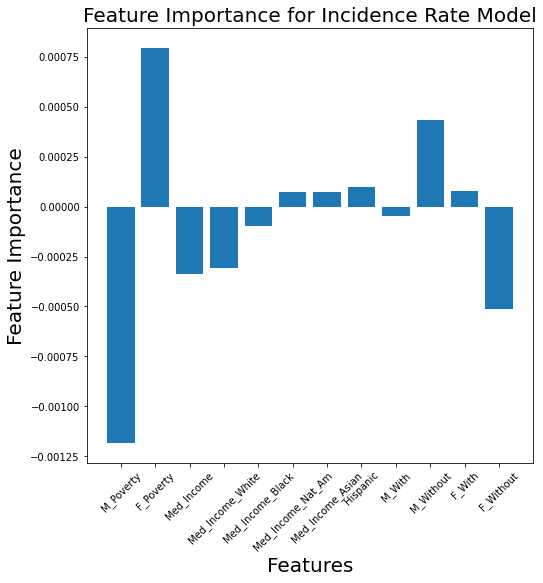

In [54]:
importance = lin_mod_inc.coef_
# plot feature importance
plt.figure(figsize = (8,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = range(len(importance)), labels = lin_mod_inc.feature_names_in_, rotation = 45)
plt.title('Feature Importance for Incidence Rate Model', size = 20)
plt.xlabel('Features', size = 20)
plt.ylabel('Feature Importance', size = 20)
plt.show()

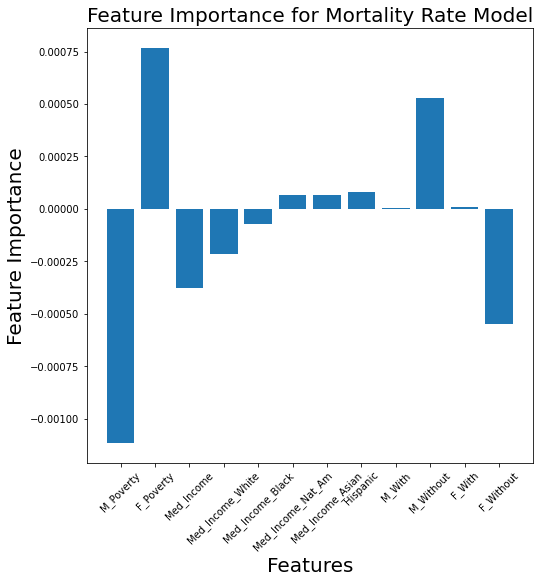

In [55]:
importance = lin_mod_mor.coef_
# plot feature importance
plt.figure(figsize = (8,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks = range(len(importance)), labels = lin_mod_inc.feature_names_in_, rotation = 45)
plt.title('Feature Importance for Mortality Rate Model', size = 20)
plt.xlabel('Features', size = 20)
plt.ylabel('Feature Importance', size = 20)
plt.show()